# Wildfire Smoke Controls on Gross Primary Production in Central Canada

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pd.set_option('max_columns', None)

In [2]:
# get data
data_in = pd.read_csv("drf_timeseries.csv", parse_dates=True, index_col=0)

In [23]:
# random test cell
data_in.loc["2005-08-05 3:00":"2007-08-05 3:00"]

datetime  smoke  AOD_1640nm  AOD_1020nm  AOD_870nm  AOD_865nm  \
20050  2007-11-18 10:00    0.0         NaN         NaN        NaN        NaN   
20051  2007-11-18 11:00    0.0         NaN         NaN        NaN        NaN   
20052  2007-11-18 12:00    0.0         NaN         NaN        NaN        NaN   
20053  2007-11-18 13:00    0.0         NaN         NaN        NaN        NaN   
20054  2007-11-18 14:00    0.0         NaN         NaN        NaN        NaN   
20055  2007-11-18 15:00    0.0         NaN         NaN        NaN        NaN   
20056  2007-11-18 16:00    0.0         NaN         NaN        NaN        NaN   
20057  2007-11-18 17:00    0.0         NaN         NaN        NaN        NaN   
20058  2007-11-18 18:00    0.0         NaN         NaN        NaN        NaN   
20059  2007-11-18 19:00    0.0         NaN         NaN        NaN        NaN   
20060  2007-11-18 20:00    0.0         NaN         NaN        NaN        NaN   
20061  2007-11-18 21:00    0.0         NaN         NaN        NaN        NaN   
20062  2007-11-18 22:00    0.0         NaN         NaN        NaN        NaN   
20063  2007-11-18 23:00    0.0         NaN         NaN        NaN        NaN   
20064   2007-11-19 0:00    0.0         NaN         NaN        NaN        NaN   
20065   2007-11-19 1:00    0.0         NaN         NaN        NaN        NaN   
20066   2007-11-19 2:00    0.0         NaN         NaN        NaN        NaN   
20067   2007-11-19 3:00    0.0         NaN         NaN        NaN        NaN   
20068   2007-11-19 4:00    0.0         NaN         NaN        NaN        NaN   
20069   2007-11-19 5:00    0.0         NaN         NaN        NaN        NaN   

       AOD_779nm  AOD_675nm  AOD_667nm  AOD_620nm  AOD_560nm  AOD_555nm  \
20050        NaN        NaN        NaN        NaN        NaN        NaN   
20051        NaN        NaN        NaN        NaN        NaN        NaN   
20052        NaN        NaN        NaN        NaN        NaN        NaN   
20053        NaN        NaN        NaN        NaN        NaN        NaN   
20054        NaN        NaN        NaN        NaN        NaN        NaN   
20055        NaN        NaN        NaN        NaN        NaN        NaN   
20056        NaN        NaN        NaN        NaN        NaN        NaN   
20057        NaN        NaN        NaN        NaN        NaN        NaN   
20058        NaN        NaN        NaN        NaN        NaN        NaN   
20059        NaN        NaN        NaN        NaN        NaN        NaN   
20060        NaN        NaN        NaN        NaN        NaN        NaN   
20061        NaN        NaN        NaN        NaN        NaN        NaN   
20062        NaN        NaN        NaN        NaN        NaN        NaN   
20063        NaN        NaN        NaN        NaN        NaN        NaN   
20064        NaN        NaN        NaN        NaN        NaN        NaN   
20065        NaN        NaN        NaN        NaN        NaN        NaN   
20066        NaN        NaN        NaN        NaN        NaN        NaN   
20067        NaN        NaN        NaN        NaN        NaN        NaN   
20068        NaN        NaN        NaN        NaN        NaN        NaN   
20069        NaN        NaN        NaN        NaN        NaN        NaN   

       AOD_551nm  AOD_532nm  AOD_531nm  AOD_510nm  AOD_500nm  AOD_490nm  \
20050        NaN        NaN        NaN        NaN        NaN        NaN   
20051        NaN        NaN        NaN        NaN        NaN        NaN   
20052        NaN        NaN        NaN        NaN        NaN        NaN   
20053        NaN        NaN        NaN        NaN        NaN        NaN   
20054        NaN        NaN        NaN        NaN        NaN        NaN   
20055        NaN        NaN        NaN        NaN        NaN        NaN   
20056        NaN        NaN        NaN        NaN        NaN        NaN   
20057        NaN        NaN        NaN        NaN        NaN        NaN   
20058        NaN        NaN        NaN        NaN        NaN        NaN   
20059   

## Find which measurements have the most complete data

In [6]:
# check data for completeness
data_len = np.shape(data_in)[0]
for key in data_in.keys():
    if key != "datetime":
        not_nans = np.shape((data_in[np.isnan(data_in[key]) == False]))[0]
        completeness = not_nans / data_len * 100
        print(f"{key}:  {round(completeness,2)} %")

smoke:  99.52 %
AOD_1640nm:  3.48 %
AOD_1020nm:  5.23 %
AOD_870nm:  5.32 %
AOD_865nm:  0.0 %
AOD_779nm:  0.0 %
AOD_675nm:  5.33 %
AOD_667nm:  0.0 %
AOD_620nm:  0.0 %
AOD_560nm:  0.0 %
AOD_555nm:  0.0 %
AOD_551nm:  0.0 %
AOD_532nm:  0.0 %
AOD_531nm:  0.0 %
AOD_510nm:  0.0 %
AOD_500nm:  4.93 %
AOD_490nm:  0.0 %
AOD_443nm:  0.0 %
AOD_440nm:  5.28 %
AOD_412nm:  0.0 %
AOD_400nm:  0.0 %
AOD_380nm:  5.32 %
AOD_340nm:  5.28 %
Precipitable_Water(cm):  5.34 %
AOD_681nm:  0.0 %
AOD_709nm:  0.0 %
Ozone(Dobson):  5.34 %
NO2(Dobson):  5.34 %
USTAR:  32.58 %
TA:  36.12 %
WD:  36.12 %
WS:  36.13 %
NEE_PI:  23.4 %
FC:  32.12 %
SC:  34.33 %
H:  32.4 %
SH:  0.0 %
LE:  32.14 %
SLE:  0.0 %
G:  0.0 %
TS_1:  36.13 %
TS_2:  36.13 %
P:  36.38 %
RH:  36.04 %
PA:  36.37 %
CO2_1:  34.89 %
CO2_2:  27.63 %
VPD_PI:  36.04 %
SWC_1:  9.05 %
SWC_2:  9.05 %
NETRAD:  35.34 %
PPFD_IN:  36.33 %
SW_IN:  35.41 %
SW_DIF:  0.0 %
PPFD_OUT:  35.51 %
SW_OUT:  35.85 %
LW_IN:  36.12 %
LW_OUT:  36.09 %
H2O:  34.89 %
RECO_PI:  10.57 

Pretty dismal. We need the AOD data, so set a cutoff at 4.9%. We can hopefully interpolate the rest

In [7]:
# set a cutoff at 4.9% and build a new dataframe with only the columns 
# that meet this criteria
data = pd.DataFrame()
data["datetime"] = data_in["datetime"]
for key in data_in.keys():
    if key != "datetime":
        not_nans = np.shape((data_in[np.isnan(data_in[key]) == False]))[0]
        completeness = not_nans / data_len * 100
        if completeness >= 4.9:
            data[key] = data_in[key]

In [16]:
# get all the AOD 
aod_list = []
for key in data.keys():
    if "AOD" in key:
        aod_list.append(key)
        print(key)

AOD_1020nm
AOD_870nm
AOD_675nm
AOD_500nm
AOD_440nm
AOD_380nm
AOD_340nm


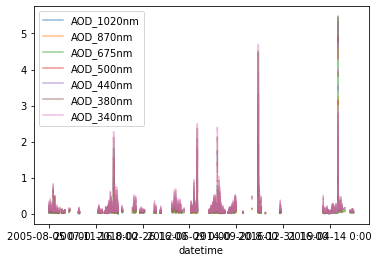

In [24]:
data.plot("datetime", aod_list, alpha=0.5);

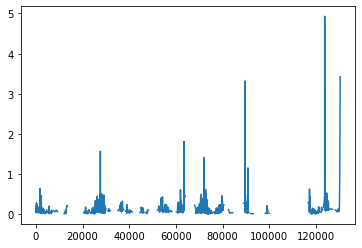

In [61]:
# interpolated method I settled on. Try messing around with this, 
# lots of methods available, most arent appropriate
data["AOD_500nm"].interpolate(method='pchip', limit=500, limit_direction='both').plot();

In [62]:
# now apply the interpolation scheme to all AOD sets
for key in aod_list:
    data[key] = data["AOD_500nm"].interpolate(method='pchip', limit=500, limit_direction='both')

In [64]:
data["datetime"]

0          2005-08-05 0:00
1          2005-08-05 1:00
2          2005-08-05 2:00
3          2005-08-05 3:00
4          2005-08-05 4:00
                ...       
130267    2020-06-14 19:00
130268    2020-06-14 20:00
130269    2020-06-14 21:00
130270    2020-06-14 22:00
130271    2020-06-14 23:00
Name: datetime, Length: 130272, dtype: object

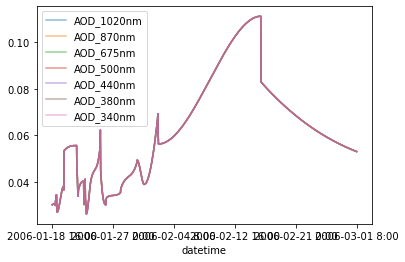

In [74]:
data.loc[4000:5000].plot("datetime", aod_list, alpha=0.5);

In [80]:
# after we finish messing about with interpolations, drop all rows that still have missing data
data_complete = data.dropna()
data_complete

datetime  smoke  AOD_1020nm  AOD_870nm  AOD_675nm  AOD_500nm  \
622    2005-08-30 22:00    0.0    0.220629   0.220629   0.220629   0.220629   
694    2005-09-02 22:00    0.0    0.071975   0.071975   0.071975   0.071975   
918     2005-09-12 6:00    0.0    0.142099   0.142099   0.142099   0.142099   
942     2005-09-13 6:00    0.0    0.104280   0.104280   0.104280   0.104280   
2410   2005-11-13 10:00    0.0    0.069657   0.069657   0.069657   0.069657   
...                 ...    ...         ...        ...        ...        ...   
45770   2010-10-25 2:00    0.0    0.076088   0.076088   0.076088   0.076088   
45774   2010-10-25 6:00    0.0    0.076067   0.076067   0.076067   0.076067   
45790  2010-10-25 22:00    0.0    0.117004   0.117004   0.117004   0.117004   
45838  2010-10-27 22:00    0.0    0.039824   0.039824   0.039824   0.039824   
45842   2010-10-28 2:00    0.0    0.047647   0.047647   0.047647   0.047647   

       AOD_440nm  AOD_380nm  AOD_340nm  Precipitable_Water(cm)  Ozone(Dobson)  \
622     0.220629   0.220629   0.220629                1.642489     361.032345   
694     0.071975   0.071975   0.071975                1.270939     359.501791   
918     0.142099   0.142099   0.142099                1.405473     354.739364   
942     0.104280   0.104280   0.104280                1.350923     354.220379   
2410    0.069657   0.069657   0.069657                1.737650     316.829372   
...          ...        ...        ...                     ...            ...   
45770   0.076088   0.076088   0.076088                1.253895     329.980913   
45774   0.076067   0.076067   0.076067                1.338477     329.883281   
45790   0.117004   0.117004   0.117004                1.467519     329.472348   
45838   0.039824   0.039824   0.039824                1.263035     328.237693   
45842   0.047647   0.047647   0.047647                1.373349     328.129294   

       NO2(Dobson)   USTAR       TA       WD      WS  NEE_PI      FC      SC  \
622       0.170076  0.4625   8.6370  333.570  3.0520  4.5965  4.4730  0.1235   
694       0.171332  0.6150  16.4685  140.270  4.4600  4.0360  3.5920  0.4445   
918       0.175241  0.7135   7.4685  291.875  5.2095  4.5025  5.2760 -0.7735   
942       0.175667  0.6965   5.7405  310.830  5.2330  2.5385  3.5650 -1.0260   
2410      0.168225  0.3320  -9.6270  343.270  2.1545  0.5260  0.7170 -0.1900   
...            ...     ...      ...      ...     ...     ...     ...     ...   
45770     0.176653  0.5140   0.5385   70.560  3.9530  1.2020  1.2205 -0.0185   
45774     0.176622  0.4965   0.4840   53.210  3.6475  1.5105  1.5150 -0.0040   
45790     0.176489  0.6395  -1.6430    7.350  4.7895  1.4130  1.5330 -0.1195   
45838     0.176089  0.6530  -6.7085  311.115  4.6210  1.2185  1.1265  0.0925   
45842     0.176054  0.6045  -7.5160  298.565  4.6060  1.3510  1.2160  0.1350   

             H       LE     TS_1     TS_2       P        RH       PA   CO2_1  \
622   -35.8550  -0.0395  10.4660  10.2775  2.9005   94.5560  94.3435  372.90   
694   -57.8000  14.8605  10.4520   9.8745  0.0000   60.0210  94.5235  371.90   
918   -47.4600   1.3610   9.3630   9.3295  0.0000   96.5740  93.7175  377.80   
942   -41.9650  -3.3535   8.3215   8.6220  0.5000   94.9580  93.8520  376.80   
2410   29.3750  14.3000   1.3195   1.7945  0.0000   84.6815  94.8450  384.25   
...        ...      ...      ...      ...     ...       ...      ...     ...   
45770  -7.5515  -1.0450   3.9705   4.2660  0.5000  100.0000  92.1985  397.65   
45774  -1.7820   0.5060   3.9015   4.2265  0.0000  100.0000  92.1215  398.40   
45790 -26.1450   7.8460   4.1150   4.4170  0.5000   97.0110  92.6535  395.00   
45838 -59.4050  -3.3355   3.6270   3.9840  0.0000   89.9975  95.0785  391.90   
45842 -39.1250  -6.7865   3.5780   3.9405  0.0000   95.5110  95.1445  393.50   

        CO2_2  VPD_PI   SWC_1   SWC_2   NETRAD  PPFD_IN    SW_IN  PPFD_OUT  \
622    369.55  0.0615  27.701  40.411   -6.005    0.000   -0.290     0.005   
694    368.55  

## Part 2: Try PCA 

In [86]:
data = data_complete.drop("datetime", axis=1)

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

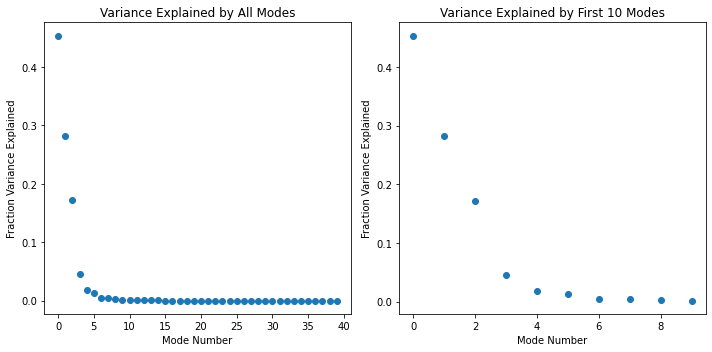

In [88]:
#plot fraction of variance explained by each mode
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

This works about as we expect, the vast majority is explained by the first few modes. Now, what are the biggest contributors to these modes?

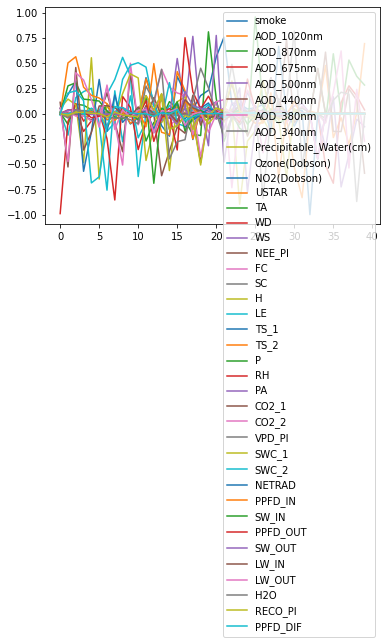

In [112]:
plt.plot(eigvecs, label=data.columns)
plt.legend()